In [354]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [355]:
#Read input file and understand the data
# "default" is my dependent variable

In [356]:
#Reading the input datafile
ger_cred=pd.read_csv('german_credit.csv')

In [357]:
#Checking if the csv is being read
ger_cred.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [358]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [359]:
# Print Shape of model data

In [360]:
ger_cred.shape

(1000, 21)

In [361]:
german_cred=pd.get_dummies(ger_cred)

In [362]:
#Printing shape of model data
german_cred.shape

(1000, 62)

In [364]:
#Printing the model data to check the changes
german_cred.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


The non-numeric are now converted to dummy that lead to increase in the amount of columns.

### Check for highly correlated variables but don't required any treatment for this use case

In [389]:
#Checking the corrleation
german_cred.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


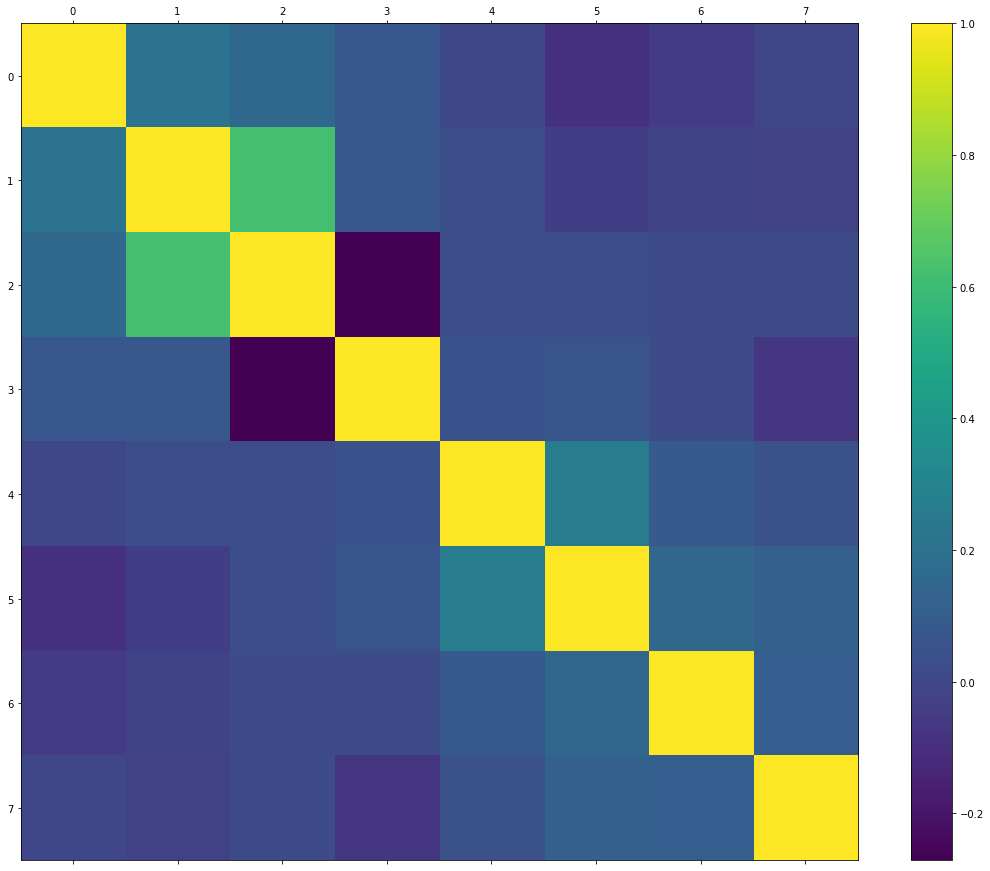

In [390]:
#Plotting to check the correlation visually
f = plt.figure(figsize=(19, 15))
plt.matshow(german_cred.corr(),fignum=f.number)
plt.colorbar()

Since the graph shows the values mostly lie in between 0.25-1, which means there is a high correlation.

### Drop the original variables which are converted to dummy

In [367]:
#Dropping the variables which were converted to dummy
german_cred=german_cred.select_dtypes(exclude=['uint8'])

In [368]:
#Seperating the target & independent variable
X=german_cred.iloc[:,1:]
y=german_cred.iloc[:,0:1]

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [369]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
y_test.shape

(300, 1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [370]:
#Building the model 
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [371]:
#Importing libraries for calculating the confusion matrix & accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix
#Printing accuracy score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
#Printing confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
print("Following is the confusion matrix:")
print(conf_mat)

Accuracy is :0.683
Following is the confusion matrix:
[[180  27]
 [ 68  25]]


### Q6 Show the list of the features importance( 1 Marks)

                            Importance
duration_in_month             0.181178
credit_amount                 0.338263
installment_as_income_perc    0.069748
present_res_since             0.080846
age                           0.251132
credits_this_bank             0.051048
people_under_maintenance      0.027786


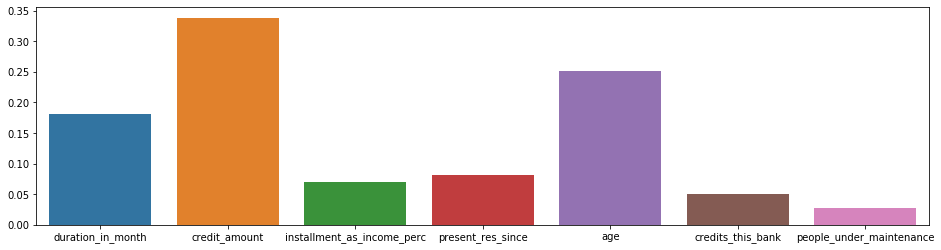

In [372]:
#Printing the list of features importance
print (pd.DataFrame(RFC.feature_importances_, columns = ["Importance"], index = X_train.columns))
#Plotting the features importance
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 16,4
sns.barplot(x=X_train.columns,y=RFC.feature_importances_)

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [373]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

In [374]:
# Use below values
num_folds = 10
seed = 77

In [375]:
#Validate the Random Forest model build above using k fold

In [376]:
KF=KFold(n_splits=10,shuffle=True,random_state=77)
for train_index,test_index in KF.split(X):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
    CVS=cross_val_score(estimator=RFC,X=X_train,y=y_train)
    print(CVS)

[0.67109635 0.71       0.68896321]
[0.68770764 0.68       0.71571906]
[0.68438538 0.68666667 0.72909699]
[0.67109635 0.69       0.73578595]
[0.67 0.7  0.71]
[0.66445183 0.71333333 0.7090301 ]
[0.70333333 0.65666667 0.71      ]
[0.6744186  0.68666667 0.71237458]
[0.68106312 0.71       0.72575251]
[0.69       0.7        0.71666667]


In [377]:
#Printing the y_pred for the K-Fold cross validation to check the accuracy
y_pred=RFC.predict(X_test)
y_pred=pd.DataFrame(y_pred,index=y_test.index)

In [378]:
#Calculate Mean score

In [379]:
CVS.mean()

0.7022222222222222

In [380]:
# Calculate score standard deviation using std()

In [381]:
CVS.std()

0.010999438818457432

# Q8 Print the confusion matrix( 1 Marks)

In [382]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
print("Following is the confusion matrix:")
print(conf_mat)

Following is the confusion matrix:
[[70  0]
 [ 7 23]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [383]:
from sklearn.metrics import accuracy_score,classification_report,recall_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)

Accuracy is :0.930


In [384]:
TN=conf_mat[0,0]
FP=conf_mat[0,1]
FN=conf_mat[1,0]
TP=conf_mat[1,1]
##Since sensitivity is how our model predicts the results as positive when the result actually is positive we can check with the sensitivity or recall score or check the classification report & look for recall under 1
Sensitivity=TP/(FN+TP)
print(Sensitivity)
print(recall_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.7666666666666667
0.7666666666666667
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        70
           1       1.00      0.77      0.87        30

    accuracy                           0.93       100
   macro avg       0.95      0.88      0.91       100
weighted avg       0.94      0.93      0.93       100



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [385]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [386]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    RFC.fit(X_, y_)
    y_pred = RFC.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [387]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.699
Standard deviation:  0.030149626863362648
